In [1]:
import pandas as pd


In [2]:
data = pd.read_excel('BIdata.xlsx')


In [3]:
data.head()


,Unnamed: 0,DateProduced,ID,ItemName,ItemType,ClientID,LoggedTime,Meal,ActionTaken,ActionReason,...,Station,EmployeeName,ImageId,LocationId,Location,Served,Saved,Sold,Shrink,Station Clean
0,0,2019-09-30,43120,Spring Mix,Menu Item,46000063050,2019-10-01T06:18:52.000Z,Breakfast,Served,Start,...,SB,NaN,NaN,51,Dedham,4.51954,0.0,4.51954,0.0,SB
1,1,2019-09-30,43122,Romaine Lettuce,Menu Item,46000055863,2019-10-01T06:19:06.000Z,Breakfast,Served,Start,...,SB,NaN,NaN,51,Dedham,4.51954,0.0,4.51954,0.0,SB
2,2,2019-09-30,43123,Romaine Lettuce,Menu Item,46000055863,2019-10-01T06:19:20.000Z,Breakfast,Served,Start,...,SB,NaN,NaN,51,Dedham,4.40931,0.0,4.40931,0.0,SB
3,3,2019-09-30,43124,Baby Spinach,Menu Item,46000055923,2019-10-01T06:19:35.000Z,Breakfast,Served,Start,...,SB,NaN,NaN,51,Dedham,4.82819,0.0,4.82819,0.0,SB
4,4,2019-09-30,43194,Plantains,Menu Item,46000001661,2019-10-01T07:06:17.000Z,Breakfast,Served,Start,...,HB,NaN,NaN,51,Dedham,4.80615,0.0,4.80615,0.0,HB


In [4]:
type(data.LoggedTime)

pandas.core.series.Series

In [5]:
data['LoggedTime'] = pd.to_datetime(data['LoggedTime'])
data['Date'] = data['LoggedTime'].dt.strftime('%Y-%m-%d')


In [6]:
data.head()

,Unnamed: 0,DateProduced,ID,ItemName,ItemType,ClientID,LoggedTime,Meal,ActionTaken,ActionReason,...,EmployeeName,ImageId,LocationId,Location,Served,Saved,Sold,Shrink,Station Clean,Date
0,0,2019-09-30,43120,Spring Mix,Menu Item,46000063050,2019-10-01 06:18:52+00:00,Breakfast,Served,Start,...,NaN,NaN,51,Dedham,4.51954,0.0,4.51954,0.0,SB,2019-10-01
1,1,2019-09-30,43122,Romaine Lettuce,Menu Item,46000055863,2019-10-01 06:19:06+00:00,Breakfast,Served,Start,...,NaN,NaN,51,Dedham,4.51954,0.0,4.51954,0.0,SB,2019-10-01
2,2,2019-09-30,43123,Romaine Lettuce,Menu Item,46000055863,2019-10-01 06:19:20+00:00,Breakfast,Served,Start,...,NaN,NaN,51,Dedham,4.40931,0.0,4.40931,0.0,SB,2019-10-01
3,3,2019-09-30,43124,Baby Spinach,Menu Item,46000055923,2019-10-01 06:19:35+00:00,Breakfast,Served,Start,...,NaN,NaN,51,Dedham,4.82819,0.0,4.82819,0.0,SB,2019-10-01
4,4,2019-09-30,43194,Plantains,Menu Item,46000001661,2019-10-01 07:06:17+00:00,Breakfast,Served,Start,...,NaN,NaN,51,Dedham,4.80615,0.0,4.80615,0.0,HB,2019-10-01


In [7]:
data1 = data.groupby(['LocationId','Station','Date','ClientID','ItemName','Location'],as_index=False).sum()


In [8]:
data1 = data1.drop(columns=['Unnamed: 0','ID','Quantity','PanID','PanWeight','EmployeeName'])



In [9]:
data1

,LocationId,Station,Date,ClientID,ItemName,Location,Served,Saved,Sold,Shrink
0,51,HB,2019-10-01,26747000000,Cajun Wedged Sweet Potatoes,Dedham,13.91137,0.0,12.26592,1.64545
1,51,HB,2019-10-01,46000001661,Plantains,Dedham,4.80615,0.0,3.02308,1.78307
2,51,HB,2019-10-01,46000005678,Chicken Cacciatore,Dedham,22.88980,0.0,21.61379,1.27601
3,51,HB,2019-10-01,46000007290,Curried Cauliflower,Dedham,18.25448,0.0,15.50672,2.74776
4,51,HB,2019-10-01,46000007582,Chicken Tenders,Dedham,45.77823,0.0,38.84676,6.93147
...,...,...,...,...,...,...,...,...,...,...
28176,55,SB,2020-01-17,46000055766,Organic Red Cabbage,Cranston,0.00000,0.0,-0.70231,0.70231
28177,55,SB,2020-01-17,46000055848,Kidney Beans,Cranston,0.00000,0.0,-2.22350,2.22350
28178,55,SB,2020-01-17,46000059425,Roasted Red Peppers,Cranston,0.00000,0.0,-2.53215,2.53215
28179,55,Soup,2019-12-30,9948248921,SOUP VEGAN PUMPKIN,Cranston,0.00000,0.0,-12.44820,12.44820


In [10]:
#data1.to_excel('dataclean.xlsx')


In [476]:
a = data1[data1['Station'].str.match('H')]
a



,LocationId,Station,Date,ClientID,ItemName,Location,Served,Saved,Sold,Shrink
0,51,HB,2019-10-01,26747000000,Cajun Wedged Sweet Potatoes,Dedham,13.91137,0.0,12.26592,1.64545
1,51,HB,2019-10-01,46000001661,Plantains,Dedham,4.80615,0.0,3.02308,1.78307
2,51,HB,2019-10-01,46000005678,Chicken Cacciatore,Dedham,22.88980,0.0,21.61379,1.27601
3,51,HB,2019-10-01,46000007290,Curried Cauliflower,Dedham,18.25448,0.0,15.50672,2.74776
4,51,HB,2019-10-01,46000007582,Chicken Tenders,Dedham,45.77823,0.0,38.84676,6.93147
...,...,...,...,...,...,...,...,...,...,...
25873,55,HB,2020-01-17,46000064881,FRENCH TOAST CHALLAH HB,Cranston,7.78206,0.0,5.88621,1.89585
25874,55,HB,2020-01-17,46000064891,Steamed Broccoli,Cranston,7.84443,0.0,8.51387,-0.66944
25875,55,HB,2020-01-17,46000064940,EGGS SCRAMBLED HB,Cranston,8.92469,0.0,8.92469,0.00000
25876,55,HB,2020-01-17,46000064980,Tomato Olive Chicken,Cranston,37.69831,0.0,34.08286,3.61545


In [477]:
a = a[(a['Served']>=0) & (a['Saved']>=0) & (a['Sold']>=0) & (a['Shrink']>=0)]

In [478]:
a['Station'].unique()


array(['HB', 'Hot Bar - ITALIAN', 'Hot Bar - GLOBAL ROTATION',
       'Hot Bar - GREEK', 'Hot Bar - Greek', 'Hot Bar - HANUKKAH',
       'Hot Bar - THANKSGIVING', 'Hot Bar - hanukkah', 'Hot Bar-Comfort',
       'Hot Bar-Fall Asian', 'Hot Bar-Fall Italian',
       'Hot Bar-Global Rotation', 'Hot Bar-Oktoberfest', 'Hot Bar-Thai',
       'Hot Bar-Thanksgiving', 'Hot Bar-Breakfast'], dtype=object)

In [479]:
a['Station']='HB'


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [480]:
a['Station'].unique()



array(['HB'], dtype=object)

In [959]:
x = a[a['ClientID']==46000022020]

In [960]:
x=x.sort_values(by=['Date'])
x


,LocationId,Station,Date,ClientID,ItemName,Location,Served,Saved,Sold,Shrink
10918,53,HB,2019-10-01,46000022020,SHEPHERDS PIE BEEF HB,Westford,7.27849,0.0,3.70377,3.57472
11070,53,HB,2019-10-05,46000022020,SHEPHERDS PIE BEEF HB,Westford,13.69718,0.0,12.01843,1.67875
11109,53,HB,2019-10-06,46000022020,SHEPHERDS PIE BEEF HB,Westford,18.28603,0.0,14.41823,3.86780
11149,53,HB,2019-10-07,46000022020,SHEPHERDS PIE BEEF HB,Westford,25.29997,0.0,19.77548,5.52449
11187,53,HB,2019-10-08,46000022020,SHEPHERDS PIE BEEF HB,Westford,14.75539,0.0,12.72390,2.03149
...,...,...,...,...,...,...,...,...,...,...
14082,53,HB,2020-01-11,46000022020,SHEPHERDS PIE BEEF HB,Westford,30.21951,0.0,28.62895,1.59056
14121,53,HB,2020-01-12,46000022020,SHEPHERDS PIE BEEF HB,Westford,8.18239,0.0,6.63268,1.54971
14154,53,HB,2020-01-13,46000022020,SHEPHERDS PIE BEEF HB,Westford,21.33276,0.0,18.19572,3.13704
14197,53,HB,2020-01-14,46000022020,SHEPHERDS PIE BEEF HB,Westford,12.79328,0.0,10.58219,2.21109


In [961]:
x= x.groupby('Date').sum().reset_index()
x=x.drop(columns=['ClientID','LocationId'])
x

,Date,Served,Saved,Sold,Shrink
0,2019-10-01,7.27849,0.0,3.70377,3.57472
1,2019-10-05,13.69718,0.0,12.01843,1.67875
2,2019-10-06,18.28603,0.0,14.41823,3.86780
3,2019-10-07,25.29997,0.0,19.77548,5.52449
4,2019-10-08,14.75539,0.0,12.72390,2.03149
...,...,...,...,...,...
78,2020-01-11,30.21951,0.0,28.62895,1.59056
79,2020-01-12,8.18239,0.0,6.63268,1.54971
80,2020-01-13,21.33276,0.0,18.19572,3.13704
81,2020-01-14,12.79328,0.0,10.58219,2.21109


In [962]:
x['Date'] = pd.to_datetime(x['Date'], format='%Y-%m-%d')

In [963]:
z =x[['Date','Shrink']]
z

,Date,Shrink
0,2019-10-01,3.57472
1,2019-10-05,1.67875
2,2019-10-06,3.86780
3,2019-10-07,5.52449
4,2019-10-08,2.03149
...,...,...
78,2020-01-11,1.59056
79,2020-01-12,1.54971
80,2020-01-13,3.13704
81,2020-01-14,2.21109


In [964]:
z['Date'] =  pd.to_datetime(z['Date'], format='%m/%d/%Y')
z = z.sort_values(by=['Date'], ascending=[True])
z.set_index('Date', inplace=True)
z

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Shrink
Date,
2019-10-01,3.57472
2019-10-05,1.67875
2019-10-06,3.86780
2019-10-07,5.52449
2019-10-08,2.03149
...,...
2020-01-11,1.59056
2020-01-12,1.54971
2020-01-13,3.13704


In [965]:
z = z.resample('D').ffill().reset_index()
z

,Date,Shrink
0,2019-10-01,3.57472
1,2019-10-02,3.57472
2,2019-10-03,3.57472
3,2019-10-04,3.57472
4,2019-10-05,1.67875
...,...,...
102,2020-01-11,1.59056
103,2020-01-12,1.54971
104,2020-01-13,3.13704
105,2020-01-14,2.21109


In [966]:
y = z.set_index('Date')

In [967]:
y.index

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10',
               ...
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
               '2020-01-14', '2020-01-15'],
              dtype='datetime64[ns]', name='Date', length=107, freq=None)

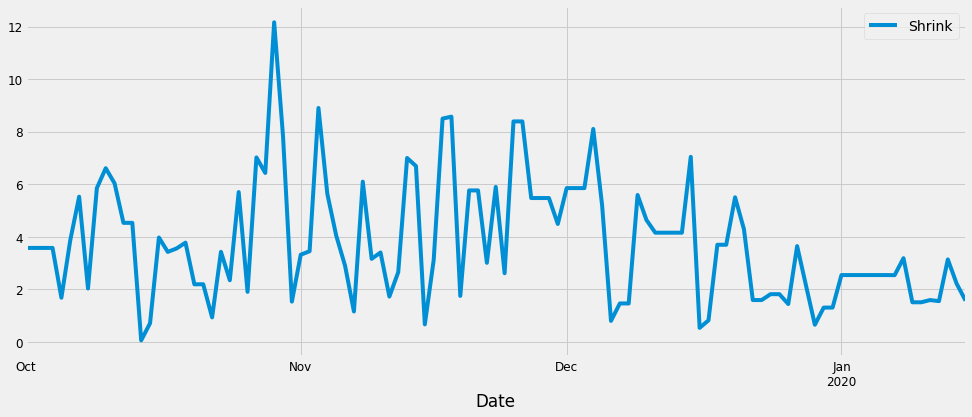

In [968]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
y.plot(figsize=(15, 6))
plt.show()

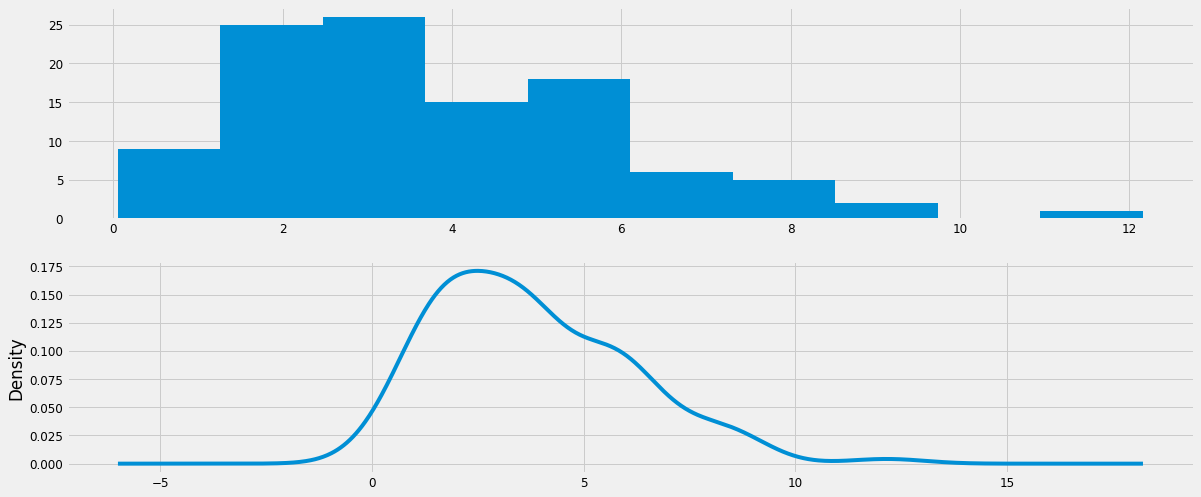

In [969]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
y.Shrink.hist()
pyplot.subplot(212)
y.Shrink.plot(kind='kde')
pyplot.show()


In [970]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

In [971]:
y

,Shrink
Date,
2019-10-01,3.57472
2019-10-02,3.57472
2019-10-03,3.57472
2019-10-04,3.57472
2019-10-05,1.67875
...,...
2020-01-11,1.59056
2020-01-12,1.54971
2020-01-13,3.13704


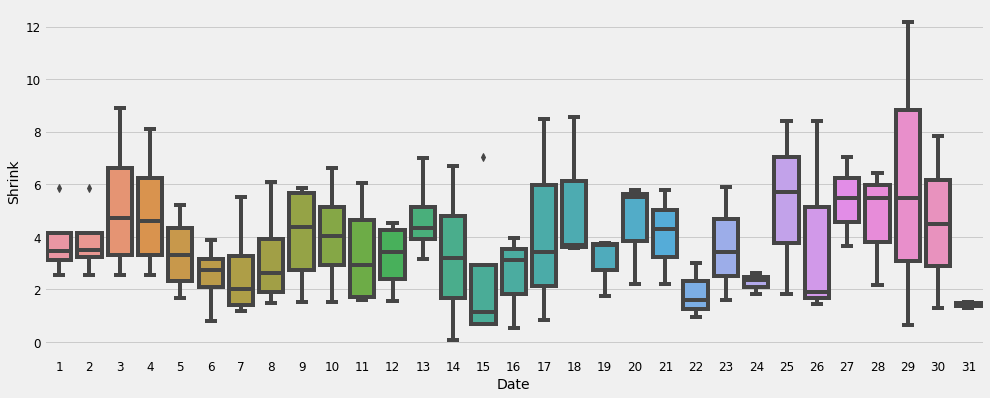

In [972]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(y.Shrink.index.day, y.Shrink, ax=ax)

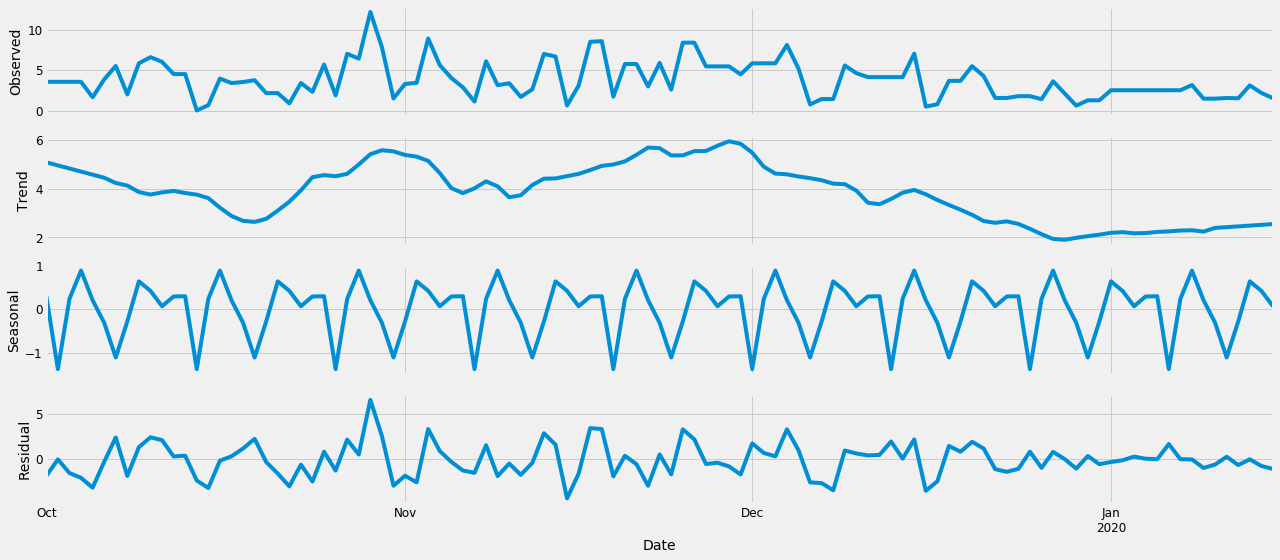

In [973]:
pd.plotting.register_matplotlib_converters()
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive',freq=12, extrapolate_trend = 12)
fig = decomposition.plot()
plt.show()

In [974]:
ts = y.Shrink - y.Shrink.shift()
ts.dropna(inplace=True)

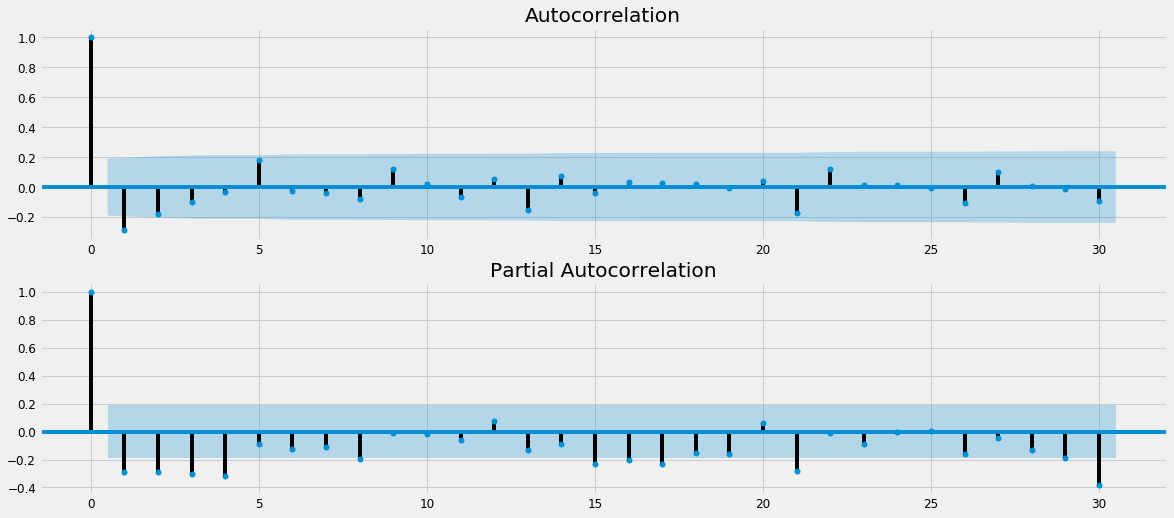

In [975]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=30)
pyplot.show()


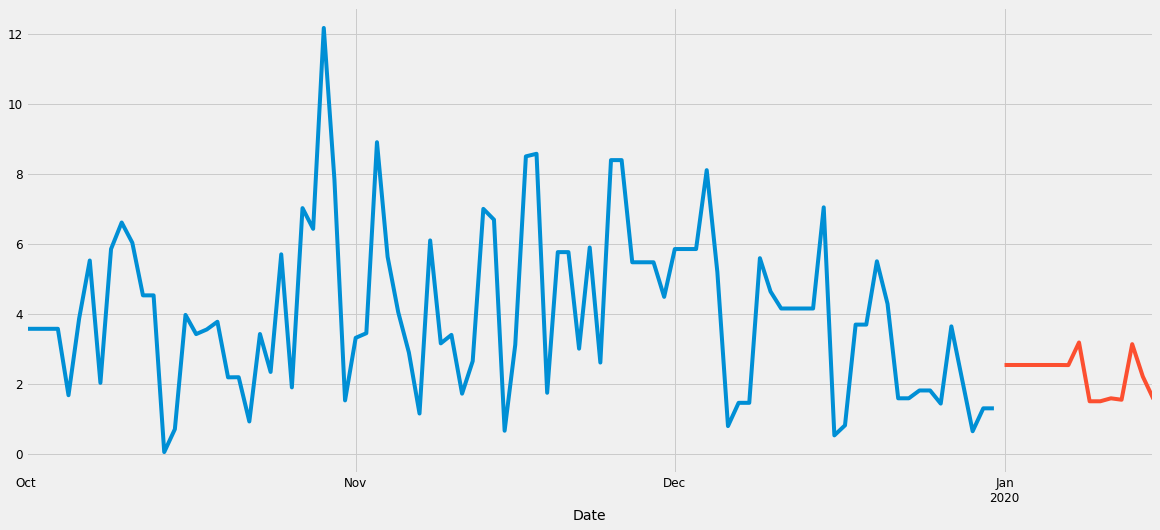

In [1015]:
train = y[:int(0.86*(len(y)))]
valid = y[int(0.86*(len(y))):]

#plotting the data
train['Shrink'].plot()
valid['Shrink'].plot()

In [1016]:
train.tail()

,Shrink
Date,
2019-12-27,3.64410
2019-12-28,2.14495
2019-12-29,0.65017
2019-12-30,1.30396
2019-12-31,1.30396


In [1017]:
valid.head()

,Shrink
Date,
2020-01-01,2.54179
2020-01-02,2.54179
2020-01-03,2.54179
2020-01-04,2.54179
2020-01-05,2.54179


In [1018]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit(disp=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  if freq is not None:
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  if freq is not None:


In [1019]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Shrink   No. Observations:                   91
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -203.438
Method:                       css-mle   S.D. of innovations              2.245
Date:                Thu, 30 Apr 2020   AIC                            414.876
Time:                        01:50:05   BIC                            424.920
Sample:                    10-02-2019   HQIC                           418.928
                         - 12-31-2019                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0153      0.028     -0.539      0.591      -0.071       0.040
ar.L1.D.Shrink     0.2778      0.120      2.315      0.023       0.043       0.513
ma.L1.D.Shrink    -0.9269      0.060    -15.420      0.000      -1.045      -0.809
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5998           +0.0000j            3.5998            0.0000
MA.1            1.0789           +0.0000j            1.0789            0.0000
-----------------------------------------------------------------------------
"""

In [1020]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)

In [1021]:
end_index

Timestamp('2020-01-15 00:00:00')

In [1022]:
# report performance
mse = mean_squared_error(y[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 2.269791001285631, MSE:5.151951189517226


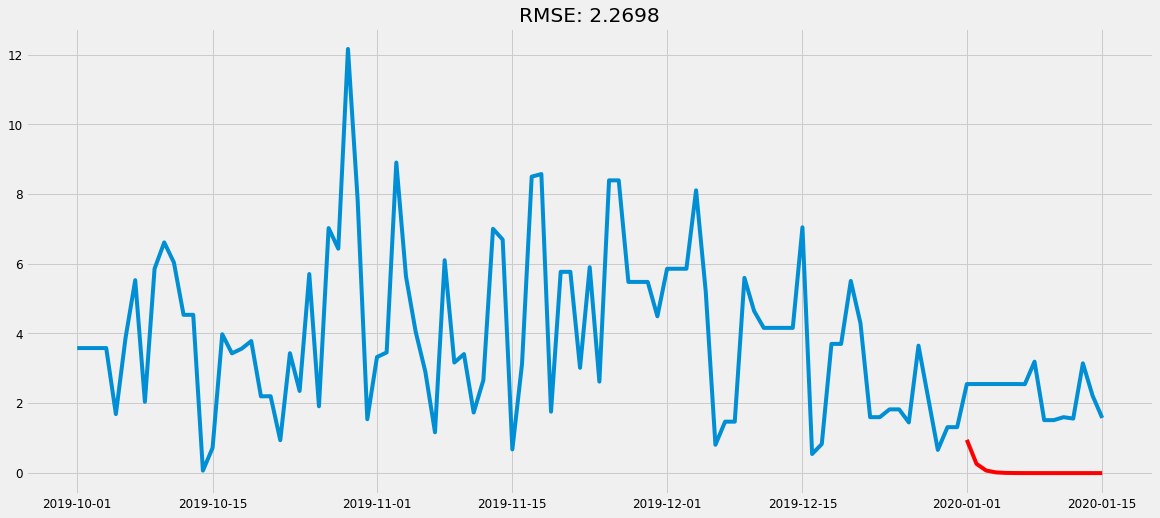

In [1023]:
plt.plot(y.Shrink)
plt.plot(predictions, color='red')
plt.title('RMSE: %.4f'% rmse)
plt.show()

In [1024]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print (predictions_ARIMA_diff.head())

2020-01-01    0.939054
2020-01-02    0.249800
2020-01-03    0.058329
2020-01-04    0.005140
2020-01-05   -0.009636
Freq: D, dtype: float64


In [1025]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())


2020-01-01    0.939054
2020-01-02    1.188854
2020-01-03    1.247183
2020-01-04    1.252322
2020-01-05    1.242686
Freq: D, dtype: float64


In [1026]:
predictions_ARIMA_log = pd.Series(valid.Shrink.iloc[0], index=valid.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2020-01-01    3.480844
2020-01-02    3.730644
2020-01-03    3.788973
2020-01-04    3.794112
2020-01-05    3.784476
dtype: float64

Text(0.5, 1.0, 'RMSE: 1.4186')

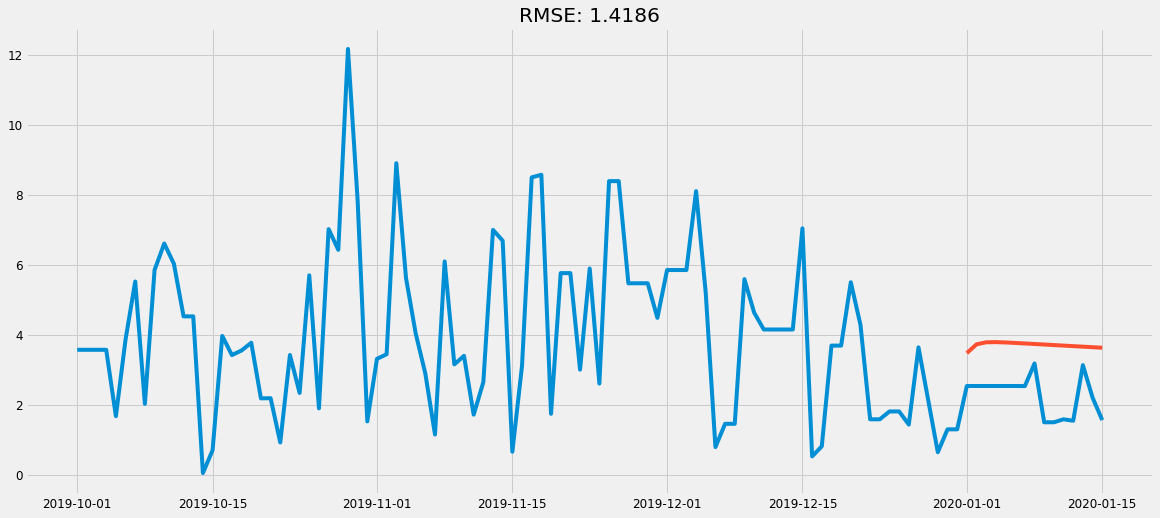

In [1027]:
import numpy as np
plt.plot(y.Shrink)
plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA_log-ts)**2)/len(ts)))

In [1028]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [1029]:
evaluate_forecast(y[start_index:end_index], predictions_ARIMA_log)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-6.503337,1.437362,1.247183,2.374916,0.175087,NaN,1.541076


In [1030]:
#building the model
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=418.659, BIC=433.790, Time=0.167 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=422.681, BIC=427.725, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=413.746, BIC=421.312, Time=0.021 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=413.692, BIC=421.258, Time=0.020 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=546.967, BIC=549.489, Time=0.005 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=415.348, BIC=425.435, Time=0.035 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=415.301, BIC=425.388, Time=0.022 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=416.659, BIC=429.268, Time=0.131 seconds
Total fit time: 0.412 seconds


ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

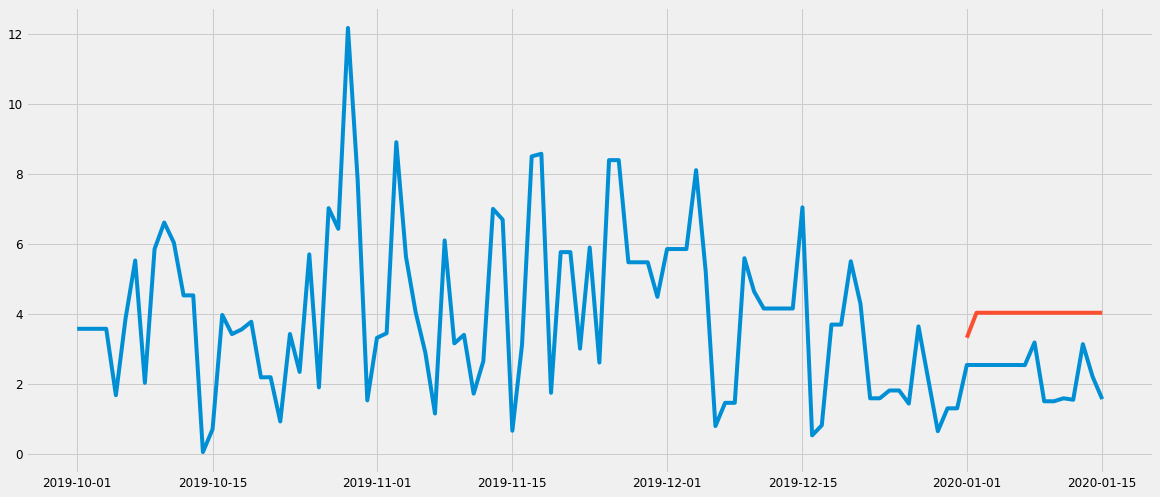

In [1031]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y.Shrink, label='Train')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [1032]:
evaluate_forecast(valid, forecast)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-9.482615,1.71576,1.490975,3.317901,0.225585,NaN,1.821511


In [1033]:
train.head()

,Shrink
Date,
2019-10-01,3.57472
2019-10-02,3.57472
2019-10-03,3.57472
2019-10-04,3.57472
2019-10-05,1.67875


In [1034]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.Shrink.values

In [1035]:
train_prophet.head()


,ds,y
0,2019-10-01,3.57472
1,2019-10-02,3.57472
2,2019-10-03,3.57472
3,2019-10-04,3.57472
4,2019-10-05,1.67875


In [1036]:
from fbprophet import Prophet

#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet( yearly_seasonality=True, seasonality_mode = 'multiplicative')
model.fit(train_prophet) #fit the model with your dataframe

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1037]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe( periods=7, freq = "D") 
future



,ds
0,2019-10-01
1,2019-10-02
2,2019-10-03
3,2019-10-04
4,2019-10-05
...,...
94,2020-01-03
95,2020-01-04
96,2020-01-05
97,2020-01-06


In [1038]:
forecast.columns


Index(['Prediction'], dtype='object')

In [1039]:
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()




,ds,yhat,yhat_lower,yhat_upper
94,2020-01-03,1.204854,-1.430975,3.603028
95,2020-01-04,1.117158,-1.493568,3.515870
96,2020-01-05,1.044740,-1.485319,3.604074
97,2020-01-06,0.735616,-1.671768,3.208401
98,2020-01-07,0.224900,-2.249738,2.602862


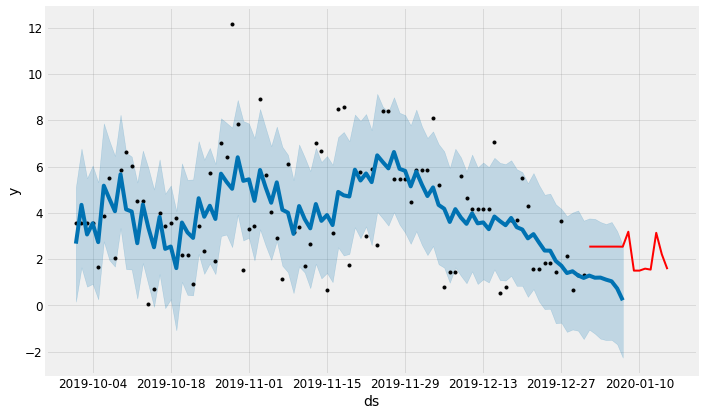

In [1040]:
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()


In [1041]:
train.tail()


,Shrink
Date,
2019-12-27,3.64410
2019-12-28,2.14495
2019-12-29,0.65017
2019-12-30,1.30396
2019-12-31,1.30396


In [1042]:
valid



,Shrink
Date,
2020-01-01,2.54179
2020-01-02,2.54179
2020-01-03,2.54179
2020-01-04,2.54179
2020-01-05,2.54179
2020-01-06,2.54179
2020-01-07,2.53855
2020-01-08,3.18437
2020-01-09,1.50562


In [1044]:
ans = ans.join(valid, on='Date')


In [1045]:
ans = ans.rename(columns={"Shrink": "American Chop Suey Shrink"})
ans

,Chicken Tenders Shrink,Macaroni & Cheese Shrink,Mashed Potatoes Shrink,Beef Cavatappi Chop Suey Shrink,Buffalo Wings Shrink,Steamed Broccoli Shrink,Scrambled Eggs Shrink,Breakfast Potatoes Shrink,SHEPHERDS PIE BEEF HB Shrink,American Chop Suey Shrink
Date,,,,,,,,,,
2020-01-01,2.40555,6.85169,4.76579,3.08380,0.00000,0.00000,6.76833,2.04978,2.54179,2.54179
2020-01-02,0.00000,13.48956,10.37720,0.00000,0.00000,2.65664,7.10757,9.74207,2.54179,2.54179
2020-01-03,4.45321,12.72728,5.55031,0.00000,0.00000,4.64857,9.63490,5.96106,2.54179,2.54179
2020-01-04,6.83368,5.77829,5.95047,0.00000,5.05628,4.49480,3.81938,7.14674,2.54179,2.54179
2020-01-05,0.00000,11.33302,8.04219,0.00000,3.26271,5.65632,4.36374,6.53536,2.54179,2.54179
2020-01-06,1.85832,6.40001,8.46754,0.00000,2.27014,0.00000,15.58161,6.24499,2.54179,2.54179
2020-01-07,0.00000,18.03422,8.00725,0.00000,3.74074,0.00000,1.96070,4.61410,2.53855,2.53855
2020-01-08,1.91928,7.92552,3.94634,0.00000,0.00000,0.00000,6.51077,7.61453,3.18437,3.18437
2020-01-09,3.24205,11.71157,14.56586,0.00000,0.00000,0.24574,10.30803,5.52015,1.50562,1.50562


In [1043]:
ans = ans.drop(columns=['American Chop Suey Shrink'])
ans

,Chicken Tenders Shrink,Macaroni & Cheese Shrink,Mashed Potatoes Shrink,Beef Cavatappi Chop Suey Shrink,Buffalo Wings Shrink,Steamed Broccoli Shrink,Scrambled Eggs Shrink,Breakfast Potatoes Shrink,SHEPHERDS PIE BEEF HB Shrink
Date,,,,,,,,,
2020-01-01,2.40555,6.85169,4.76579,3.08380,0.00000,0.00000,6.76833,2.04978,2.54179
2020-01-02,0.00000,13.48956,10.37720,0.00000,0.00000,2.65664,7.10757,9.74207,2.54179
2020-01-03,4.45321,12.72728,5.55031,0.00000,0.00000,4.64857,9.63490,5.96106,2.54179
2020-01-04,6.83368,5.77829,5.95047,0.00000,5.05628,4.49480,3.81938,7.14674,2.54179
2020-01-05,0.00000,11.33302,8.04219,0.00000,3.26271,5.65632,4.36374,6.53536,2.54179
2020-01-06,1.85832,6.40001,8.46754,0.00000,2.27014,0.00000,15.58161,6.24499,2.54179
2020-01-07,0.00000,18.03422,8.00725,0.00000,3.74074,0.00000,1.96070,4.61410,2.53855
2020-01-08,1.91928,7.92552,3.94634,0.00000,0.00000,0.00000,6.51077,7.61453,3.18437
2020-01-09,3.24205,11.71157,14.56586,0.00000,0.00000,0.24574,10.30803,5.52015,1.50562


In [1046]:
ans.to_csv('top10_waste_prediction.csv')